In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

### Data Loading

In [23]:
df= pd.read_csv(r"C:\Users\husai\OneDrive\Desktop\Project&Assignments\HypothesisTesting\property.csv")

In [24]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


### Handling Missing values

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [26]:
# Converting Date into datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Check the data type to confirm the conversion
print(df['Date'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 13580 entries, 0 to 13579
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
13580 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 106.2 KB
None


In [27]:
# There in Car column some values are missing and don't want to Know so,
df['Car'].fillna('Unknown', inplace=True)

In [28]:

# Calculate the average BuildingArea for each Landsize
average_building_area = df.groupby('Landsize')['BuildingArea'].mean()
average_building_area

# Create a function to fill missing BuildingArea based on Landsize
def fill_building_area(row):
    if pd.isnull(row['BuildingArea']):
        return average_building_area.get(row['Landsize'], row['BuildingArea'])  # Fallback to original if not found
    return row['BuildingArea']

# Apply the function to fill missing BuildingArea values
df['BuildingArea'] = df.apply(fill_building_area, axis=1)
df['BuildingArea'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13580 entries, 0 to 13579
Series name: BuildingArea
Non-Null Count  Dtype  
--------------  -----  
13223 non-null  float64
dtypes: float64(1)
memory usage: 106.2 KB


In [29]:
# These values dont want to Know so,
df['BuildingArea'].fillna('Unknown', inplace=True)

In [30]:
# Handling missing values in the CouncilArea column 
df['CouncilArea'] = df.groupby('Suburb')['CouncilArea'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
df['CouncilArea'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13580 entries, 0 to 13579
Series name: CouncilArea
Non-Null Count  Dtype 
--------------  ----- 
13573 non-null  object
dtypes: object(1)
memory usage: 106.2+ KB


In [31]:
# These values dont want to Know so,
df['CouncilArea'].fillna('Unknown', inplace=True)

In [32]:
#  filling missing in YearBuilt colomn
df['YearBuilt'] = df.groupby('Date')['YearBuilt'].transform(lambda x: x.fillna(x.median()))
df['YearBuilt'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13580 entries, 0 to 13579
Series name: YearBuilt
Non-Null Count  Dtype  
--------------  -----  
13578 non-null  float64
dtypes: float64(1)
memory usage: 106.2 KB


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  object        
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  object        
 4   Price          13580 non-null  float64       
 5   Method         13580 non-null  object        
 6   SellerG        13580 non-null  object        
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  float64       
 10  Bedroom2       13580 non-null  float64       
 11  Bathroom       13580 non-null  float64       
 12  Car            13580 non-null  object        
 13  Landsize       13580 non-null  float64       
 14  BuildingArea   13580 non-null  object        
 15  YearBuilt      1357

## My data is cleaned now the First task is 

### 1. For the suburb Altona, it is postulated that a typical property sells for USD800,000. Use the data at hand to test this assumption. Is the typical property price really USD800,000 or has it increased? Use a significance level of 5%. 

### Now the Hypothesises
- Null Hypothesis (𝐻0): The mean property price in Altona is USD 800,000 (𝜇=800,000).
- Alternative Hypothesis (𝐻𝑎): The mean property price in Altona is not USD 800,000 (𝜇 ≠ 800,000).

In [13]:
# Filter data for Altona
altona_prices = df[df['Suburb'] == 'Altona']['Price']

# Calculate sample statistics
sample_mean = altona_prices.mean()
sample_std = altona_prices.std(ddof=1)  # Sample standard deviation
n = altona_prices.count()

# Perform the one-sample t-test
hypothesized_mean = 800000
t_statistic, p_value = ss.ttest_1samp(altona_prices, hypothesized_mean)

# Two-tailed test p-value
p_value_two_tailed = p_value / 2  # since we want to check for both directions

# Determine significance
alpha = 0.05
if p_value_two_tailed < alpha:
    result = "Reject the null hypothesis. The typical property price in Altona is significantly different from USD 800,000."
else:
    result = "Fail to reject the null hypothesis. There is not enough evidence to suggest the typical property price in Altona is different from USD 800,000."

# Print results
print(f"Sample Mean: {sample_mean}")
print(f"Sample Standard Deviation: {sample_std}")
print(f"t-statistic: {t_statistic}")
print(f"p-value (two-tailed): {p_value_two_tailed}")
print(result)


Sample Mean: 834830.4054054054
Sample Standard Deviation: 291546.04547367844
t-statistic: 1.0277020770199676
p-value (two-tailed): 0.1537416356527775
Fail to reject the null hypothesis. There is not enough evidence to suggest the typical property price in Altona is different from USD 800,000.


### Interprtation 
- Since the p-value (0.154) is greater than the significance level (0.05), you fail to reject the null hypothesis. This means that there is not enough statistical evidence to conclude that the typical property price in Altona is different from USD 800,000.

### Solution
- Based on your analysis, it seems that the assumption of a typical property price of USD 800,000 in Altona is consistent with the data. While the sample mean is higher, the difference is not statistically significant given the variability in property prices.

### 2. For the year 2016, is there any difference in prices of properties sold in the summer months vs winter months? Consider months from October till March as winter months and the rest as summer months. Use a significance level of 5%. 

### Hypothesises
- Null Hypothesis (𝐻0): There is no difference in mean property prices between summer and winter months (𝜇 summer = 𝜇 winter).
- Alternative Hypothesis (𝐻𝑎): There is a difference in mean property prices between summer and winter months (𝜇 summer ≠ 𝜇 winter).

In [35]:
# Filter data for the year 2016
df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' is in datetime format
df_2016 = df[df['Date'].dt.year == 2016]

# Step 2: Categorize months into summer and winter
df_2016['Season'] = df_2016['Date'].dt.month.apply(lambda x: 'Winter' if x in [10, 11, 12, 1, 2, 3] else 'Summer')

# Step 3: Separate property prices by season
summer_prices = df_2016[df_2016['Season'] == 'Summer']['Price']
winter_prices = df_2016[df_2016['Season'] == 'Winter']['Price']

# Step 4: Perform the two-sample t-test
t_statistic, p_value = ss.ttest_ind(summer_prices, winter_prices, equal_var=False)

# Step 5: Determine significance
alpha = 0.05
if p_value < alpha:
    result = "Reject the null hypothesis. There is a significant difference in prices."
else:
    result = "Fail to reject the null hypothesis. There is not enough evidence to suggest a significant difference in prices."

# Print results
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")
print(result)

t-statistic: -3.9211012778003753
p-value: 8.950129747463378e-05
Reject the null hypothesis. There is a significant difference in prices.


C:\Users\husai\AppData\Local\Temp\ipykernel_11796\371147639.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016['Season'] = df_2016['Date'].dt.month.apply(lambda x: 'Winter' if x in [10, 11, 12, 1, 2, 3] else 'Summer')


 ### Visualizing the Results

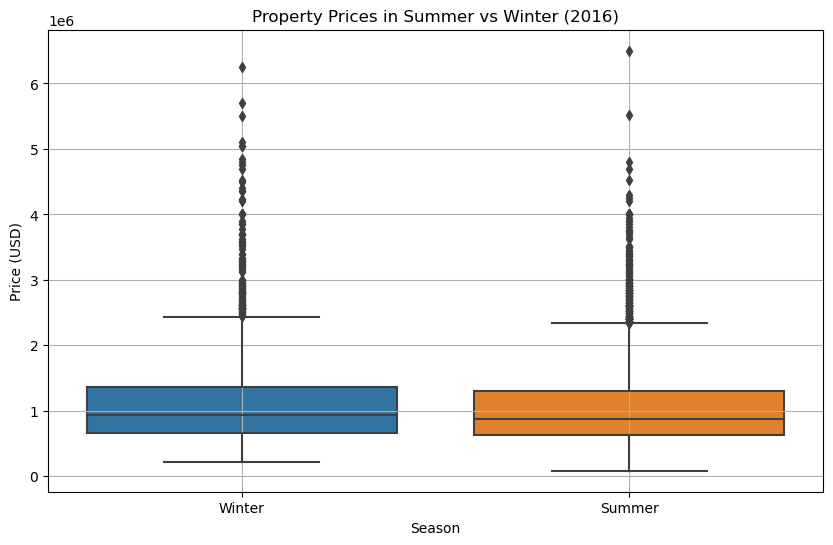

In [36]:
# Create a new column for the season
df['Season'] = df['Date'].dt.month.apply(lambda x: 'Summer' if x in [4, 5, 6, 7, 8, 9] else 'Winter')

# Filter for the year 2016
df_2016 = df[df['Date'].dt.year == 2016]

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='Price', data=df_2016)
plt.title('Property Prices in Summer vs Winter (2016)')
plt.xlabel('Season')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


### Interprtation
- It indicates that the t-statistic is approximately -3.92, and the p-value is about 8.950129747463378e-05 Given that the p-value is much lower than the significance level of 0.05, it correctly rejecting the null hypothesis.

### Solution
- This means there is a statistically significant difference in property prices between the summer and winter months for the year 2016.

### 3. For the suburb Abbotsford, what is the probability that out of 10 properties sold, 3 will not have car parking? Use the column car in the dataset. Round off your answer to 3 decimal places. 

In [39]:
from scipy.stats import binom

#Filtering the data for Abbotsford
abbotsford_data = df[df['Suburb'] == 'Abbotsford']

# Calculate total properties and properties without parking
total_properties = abbotsford_data.shape[0]
properties_without_parking = abbotsford_data[abbotsford_data['Car'] == 'No'].shape[0]

# Calculate probability of not having parking
p = properties_without_parking / total_properties

# Calculate the probability of exactly 3 out of 10 properties not having parking
n = 10  # number of properties sold
k = 3   # properties without parking
probability = binom.pmf(k, n, p)

# Round off the result
rounded_probability = round(probability, 3)

# Print the result
print(rounded_probability)

0.0


In [40]:
# Verify how many properties in Abbotsford have parking versus those that do not.
print(abbotsford_data['Car'].value_counts())

Car
1.0    29
0.0    15
2.0    12
Name: count, dtype: int64


In [42]:
# Calculate the Probability 𝑝
total_properties = abbotsford_data.shape[0]
properties_without_parking = abbotsford_data[abbotsford_data['Car'] == 'No'].shape[0]
p = properties_without_parking / total_properties
print(f"Probability of no car parking (p): {p}")


Probability of no car parking (p): 0.0


### Solution
- There is no probability of selecting 3 properties without car parking from Abbotsford, as no such properties exist in your dataset.

### 4. In the suburb Abbotsford, what are the chances of finding a property with 3 rooms? Round your answer to 3 decimal places. 

In [44]:
#Filtering the data for Abbotsford
abbotsford_properties = df[df['Suburb'] == 'Abbotsford']

# Total number of properties in Abbotsford
total_properties = abbotsford_properties.shape[0]

# Count the number of properties with 3 rooms
properties_with_3_rooms = abbotsford_properties[abbotsford_properties['Rooms'] == 3].shape[0]

# Calculate the probability
probability_3_rooms = properties_with_3_rooms / total_properties if total_properties > 0 else 0

# Round to 3 decimal places
probability_3_rooms_rounded = round(probability_3_rooms, 3)

probability_3_rooms_rounded


0.357

### Solution
- The probability of finding a property with 3 rooms in Abbotsford is approximately 0.357. This means there's about a 35.7% chance of randomly selecting a property in that suburb that has 3 rooms.

### 5. In the suburb Abbotsford, what are the chances of finding a property with 2 bathrooms? Round your answer to 3 decimal places. 

In [45]:
# Filter for Abbotsford properties
abbotsford_properties = df[df['Suburb'] == 'Abbotsford']

# Total number of properties in Abbotsford
total_properties = len(abbotsford_properties)

# Number of properties with 2 bathrooms
properties_with_2_bathrooms = len(abbotsford_properties[abbotsford_properties['Bathroom'] == 2])

# Calculate probability
probability_2_bathrooms = properties_with_2_bathrooms / total_properties

# Round to 3 decimal places
probability_2_bathrooms_rounded = round(probability_2_bathrooms, 3)

probability_2_bathrooms_rounded

0.339

### Solution
- The probability of finding a property with 2 rooms in Abbotsford is approximately 0.339. This means there's about a 33.9% chance of randomly selecting a property in that suburb that has 2 rooms.